# Taxi Trips Analysis Project

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1: Introduction

In [3]:
# Loading the dataset:
url = '/workspaces/AnyoneAI/Proyecto_Final/yellow_tripdata_2022-05.parquet'
df = pd.read_parquet(url, engine="fastparquet")

In [4]:
# We show the first 5 rows of the dataframe:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [5]:
# We show the shape of the dataframe and the data type of values in the columns:
print(df.shape)
print(df.dtypes)

(3588295, 19)
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [6]:
# Check for missing values
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          129524
trip_distance                 0
RatecodeID               129524
store_and_fwd_flag       129524
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     129524
airport_fee              129524
dtype: int64

In [7]:
# We show some descriptive statistics of the numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,3588295.0,1.713103,1.0,1.0,2.0,2.0,6.0,0.488809
tpep_pickup_datetime,3588295,2022-05-16 07:50:29.219311616,2003-01-01 00:06:06,2022-05-08 18:14:16.500000,2022-05-16 09:14:42,2022-05-23 18:03:17,2022-06-01 23:55:30,NaN
tpep_dropoff_datetime,3588295,2022-05-16 08:08:42.275203072,2003-01-01 00:31:38,2022-05-08 18:32:36,2022-05-16 09:33:15,2022-05-23 18:21:03.500000,2022-06-02 00:03:51,NaN
passenger_count,3458771.0,1.393923,0.0,1.0,1.0,1.0,9.0,0.955549
trip_distance,3588295.0,6.856861,0.0,1.15,1.96,3.73,357192.65,690.848782
RatecodeID,3458771.0,1.365674,1.0,1.0,1.0,1.0,99.0,5.239789
PULocationID,3588295.0,164.573797,1.0,132.0,162.0,234.0,265.0,65.628132
DOLocationID,3588295.0,162.551711,1.0,113.0,162.0,234.0,265.0,70.279259
payment_type,3588295.0,1.183209,0.0,1.0,1.0,1.0,4.0,0.507599
fare_amount,3588295.0,15.168132,-1311.5,7.0,10.5,17.0,6966.5,14.89484


------

In [8]:
df[(df['tip_amount'] < 0) | (df['fare_amount'] < 0) | (df['extra'] < 0) | (df['mta_tax'] < 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
100,2,2022-05-01 00:46:22,2022-05-01 01:04:25,1.0,4.43,1.0,N,230,7,4,-16.50,-0.5,-0.5,0.00,0.0,-0.3,-20.30,-2.5,0.0
129,2,2022-05-01 00:31:38,2022-05-01 00:33:23,1.0,0.32,1.0,N,263,141,4,-3.50,-0.5,-0.5,0.00,0.0,-0.3,-7.30,-2.5,0.0
602,2,2022-05-01 00:44:58,2022-05-01 00:48:58,1.0,0.79,1.0,N,163,237,4,-5.00,-0.5,-0.5,0.00,0.0,-0.3,-8.80,-2.5,0.0
844,2,2022-05-01 00:48:28,2022-05-01 00:48:36,1.0,0.00,2.0,N,107,107,4,-52.00,0.0,-0.5,0.00,0.0,-0.3,-55.30,-2.5,0.0
884,2,2022-05-01 00:31:21,2022-05-01 00:33:08,1.0,0.67,1.0,N,263,141,4,-4.00,-0.5,-0.5,0.00,0.0,-0.3,-7.80,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571051,2,2022-05-26 15:17:09,2022-05-26 15:18:19,NaN,0.24,NaN,None,50,50,0,-31.28,0.0,0.5,4.30,0.0,0.3,-23.68,NaN,NaN
3571313,2,2022-05-26 16:20:04,2022-05-26 17:29:38,NaN,1.39,NaN,None,79,211,0,-94.29,0.0,0.5,15.79,0.0,0.3,-75.20,NaN,NaN
3582832,2,2022-05-30 01:18:00,2022-05-30 01:36:00,NaN,0.93,NaN,None,209,79,0,-19.40,0.0,0.5,0.00,0.0,0.3,-16.10,NaN,NaN
3583663,2,2022-05-30 12:02:00,2022-05-30 12:47:00,NaN,4.00,NaN,None,263,125,0,-33.58,0.0,0.5,0.00,0.0,0.3,-30.28,NaN,NaN


There're 20692 records with negative numerical values.

--------

``Improvement_surcharge:`` 0.30 improvement surcharge assessed trips at the flag drop.
So it should be either 0.30 or 0. Other values to be considered as mistake.

In [9]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
 0.3    3566256
-0.3      20663
 0.0       1376
Name: count, dtype: int64

``MTA_tax:`` 0.50 MTA tax that is automatically triggered based on the metered rate in
use.

Should be either 0 or 0.5

In [10]:
df['mta_tax'].value_counts()

mta_tax
 0.50    3530087
 0.00      38227
-0.50      19969
 3.30          2
 0.07          2
 2.80          1
 0.11          1
-0.07          1
 0.26          1
 0.35          1
 0.12          1
 0.10          1
 0.08          1
Name: count, dtype: int64

``Extra:`` Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

Should be either 0.5, 1 or 0

In [11]:
df['extra'].value_counts()

extra
0.00    1478115
0.50     649518
2.50     506543
1.00     441814
3.00     235008
         ...   
0.05          1
4.80          1
2.51          1
8.55          1
4.82          1
Name: count, Length: 61, dtype: int64

`Fare_amount:` The time-and-distance fare calculated by the meter.

The fare can be different, but it can't be less than 0 or astronomicaly high


In [12]:
df['fare_amount'].sort_values()

2536784   -1311.5
1779648    -900.0
2345183    -576.0
1595148    -535.0
1636750    -500.0
            ...  
3248725     855.0
1779649     900.0
1788460     900.0
2536785    1311.5
3414224    6966.5
Name: fare_amount, Length: 3588295, dtype: float64

Bad pipe message: %s [b'\x11\xef\x9a\xc0\x87\x9cA\xe8i\x11(5\xaf\x0e\xd2\xc6\xb4f \xc7\xa0\xb8y\xdf\x9c\x98b2g<\x8b\x9b\xa3\x05\xd1E\xab\xd2\xa6\x15\xbb\x1cvzL\xca\xb0|\x1f\xdf\xb7\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00', b'\x00\t127.0.0.1']
Bad pipe message: %s [b"\xe7U],\xd0\x1f[,M\xe5\xdd\xc9^\xa6\xe4\xe8\xb7\x92\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\

`Tolls_amount:` Total amount of all tolls paid in trip.

Can't be negative

In [13]:
df['tolls_amount'].sort_values()

2292202    -50.75
791592     -47.00
297347     -45.00
2345183    -40.30
1163481    -38.55
            ...  
3193077     99.25
864403     109.70
32607      239.13
1924093    685.58
2349147    813.75
Name: tolls_amount, Length: 3588295, dtype: float64

`Tip_amount:` This field is automatically populated for credit card tips. Cash tips are not included.

Can't be negative

In [14]:
df['tip_amount'].sort_values()

3320234   -145.70
2124407    -89.96
3273841    -88.08
1904862    -75.00
1055074    -62.84
            ...  
765043     300.00
2499800    300.00
3146700    300.01
2720989    408.00
3107847    665.00
Name: tip_amount, Length: 3588295, dtype: float64

`Payment_type:` A numeric code signifying how the passenger paid for the trip. 

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided trip

In [15]:
df.payment_type.value_counts()

payment_type
1    2720127
2     706333
0     129524
3      16333
4      15978
Name: count, dtype: int64

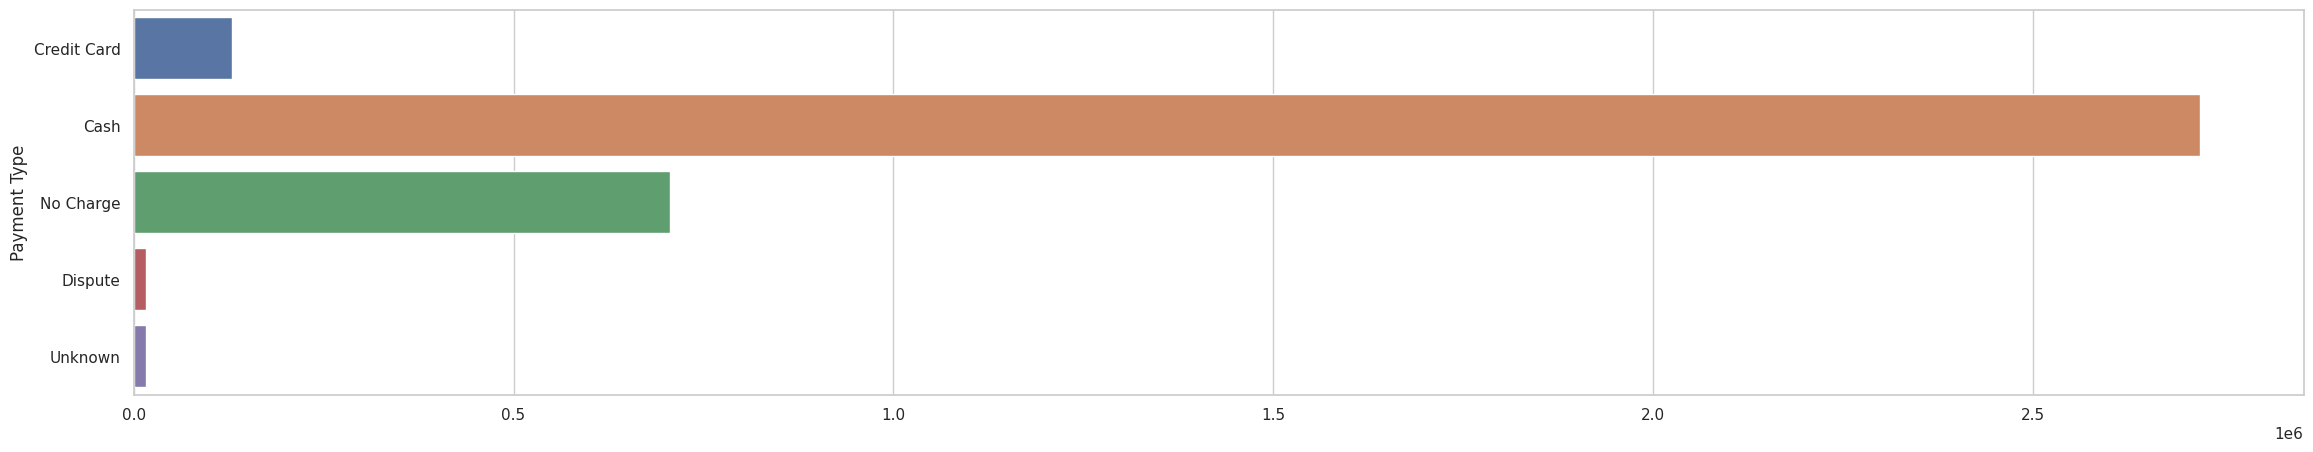

In [16]:
plt.figure(figsize=(28, 5))
sns.countplot(data=df, y='payment_type', orient='h')
plt.yticks(np.arange(5), ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown'])
plt.ylabel('Payment Type')
plt.xlabel(None)
plt.show()